# Derivación Simbólica
- Sympy nos permite calcular la derivada de funciones de una variable mediante el método 
${\tt sp.diff(x)}$


- Calcularemos la derida de la función
$$
f(x)=\sin(x)
$$

In [1]:
import sympy as sp #asociamos el alias sp al paquete sympy
x=sp.symbols('x') #la variable x será un tipo simbólico
f=sp.sin(x)
df=sp.diff(f,x)  #la variable df almacena un objeto función de Sympy
print(df)

cos(x)


- Cálculo de la derivada de la función 
$$
\displaystyle f(x)=e^{x^2}- \ln \left(\sqrt{(x^2-5)^3} \right) 
$$

In [2]:
f=sp.exp(x**2)- sp.log(sp.sqrt( (x**2-5)**3 ))
df=sp.diff(f,x)
print(df)
                       

2*x*exp(x**2) - 3*x/(x**2 - 5)


# Método de Newton
- El método de Newton es una técnica numérica para aproximar raíces de ecuaciones $f(x)=0$
- $x_0$ dado
- $\displaystyle  x_{k+1}=x_k -\frac{f(x_k)}{f'(x_k)}$


- Usamos la librería ${\tt Numpy}$
- Nota: No estamos trabajando en cálculo simbólico

In [3]:
import numpy as np
f= lambda x: np.exp(x) - 1./x
df=lambda x: np.exp(x) - 1./x**2

def newton(xk):
    return xk-f(xk)/df(xk)

x0=3.
x1=newton(x0)
print('x1= ', x1)
x2=newton(x1)
print('x2= ', x2)
x3=newton(x2)
print('x3= ', x3)


x1=  2.01112533718
x2=  1.04572884912
x3=  0.0673842297177


- Este proceso se puede repetir en un Bucle ${\tt for}$ con el método ${\tt range}$
- ${\tt range(val\_min, val\_max, step)}$: crea una lista de elementos equiespaciados, con paso ${\tt step}$, que empieza en ${\tt val\_min}$ hasta ${\tt val\_max-step}$

In [4]:
for i in range(0,5):#paso 1
    print(i)

0
1
2
3
4


In [5]:
for i in range(-5,5,2): #paso 2
    print(i)

-5
-3
-1
1
3


In [6]:
xk=3.
n=5 #numero de iteraciones
for k in range(0,n): # El bucle va desde 0 hasta n-1
    xk1=newton(xk)
    xk=xk1
    print('xk= ', xk)

xk=  2.01112533718
xk=  1.04572884912
xk=  0.0673842297177
xk=  0.00455196025838
xk=  2.07205581709e-05


- $\textbf{Observación}:$ Podemos convertir una función simbólica (de Sympy) a una función de tipo numérico (de NumPy)
- Para ello tenemos que usar el método ${\tt lambdify}$ de Sympy

In [7]:
x=sp.symbols('x')
f1=sp.exp(x)-1/x
df1=sp.diff(f1,x)

# f1 y df1 son objetos de Sympy (simbólico)
# Convertimos dichos objetos a funciones de Numpy

f=sp.lambdify(x,f1,"numpy")
df=sp.lambdify(x,df1,"numpy")

x0=3.
x1=newton(x0)
print("x1=", x1)

x1= 2.02200585185


# Polinomio de Taylor
- Calcular el polinomio de Taylor de grado n asociado a la función $f(x)$ y centrado en el punto $x_0$
- $\displaystyle p_{n,x_0}(x)=f(x_0)+\frac{f'(x_0)}{1!}(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+  \frac{f^{(3}(x_0)}{3!}(x-x_0)^3+ \ldots + \frac{f^{(n}(x_0)}{n!}(x-x_0)^n$
- El polinomio de Taylor es una aproximación local de la función $f$ en un entorno del punto $x_0$ 
- Usaremos el método ${\tt series}$ de ${\tt Sympy}$ para calcular el polinomio de Taylor

- Calcularemos el polinomio de Taylor de grado $n$ asociado a la función $\sin(x)$ y centrada en $x_0=0$ (polinomio de McLaurin)

- $\textbf{Ejemplo 1}$: Calcular el polinomio de McLaurin de grado $3$ y $4$, centrado en $x_0=0$, de la función $f(x)=\sin(x)$ 

In [8]:
import sympy as sp  #si lo tenemos importado/cargado, no hay que volver a importarlo
x=sp.symbols('x')
f=sp.sin(x)  
x0=0
n=3 #grado
p3=sp.series(f,x,x0,n)
print(p3)
n=4
p4=sp.series(f,x,x0,n)
print(p4)



x + O(x**3)
x - x**3/6 + O(x**4)


- Los polinomios de Taylor, son devueltos con la indicación del orden de aproximación final 
$p_4=x-\frac{1}{6}x^3+ \mathcal{O}(x^4)$
- Si queremos eliminar la indicación de orden, basta teclear ${\tt p4.removeO()}$

In [9]:
print(p4.removeO())

-x**3/6 + x


- Podemos representar fácilmente una función junto con sus polinomios de Taylor

In [10]:
from sympy.plotting import plot
f1=plot(f,show=False,line_color='blue',xlim=(-5,5),ylim=(-10,10))
f2=plot(p3.removeO(),show=False,line_color='red')
f3=plot(p4.removeO(),show=False, line_color='gray')
f1.extend(f2)
f1.extend(f3)
f1.show()

- $\textbf{Ejemplo 2}$: Calcular los polinomio de Taylor de grado desde grado $2$ hasta grado $5$, centrado en $x_0=\frac{\pi}{4}$, de la función $\displaystyle f(x)= d^{\sin(x)}$

In [11]:
x=sp.symbols('x')
f=sp.exp(sp.sin(x))  
x0=sp.pi/4.
n=2 #grado
p2=sp.series(f,x,x0,n)
print(p2.removeO())
n=3
p3=sp.series(f,x,x0,n)
print(p3.removeO())
n=4
p4=sp.series(f,x,x0,n)
print(p4.removeO())



sqrt(2)*(x - 0.25*pi)*exp(sqrt(2)/2)/2 + exp(sqrt(2)/2)
(x - 0.25*pi)**2*(-sqrt(2)*exp(sqrt(2)/2)/4 + exp(sqrt(2)/2)/4) + sqrt(2)*(x - 0.25*pi)*exp(sqrt(2)/2)/2 + exp(sqrt(2)/2)
(x - 0.25*pi)**3*(-exp(sqrt(2)/2)/4 - sqrt(2)*exp(sqrt(2)/2)/24) + (x - 0.25*pi)**2*(-sqrt(2)*exp(sqrt(2)/2)/4 + exp(sqrt(2)/2)/4) + sqrt(2)*(x - 0.25*pi)*exp(sqrt(2)/2)/2 + exp(sqrt(2)/2)


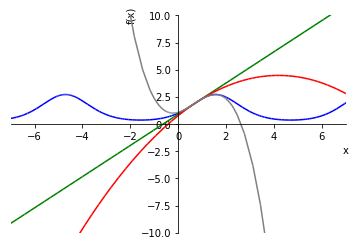

In [12]:
f1=plot(f,xlim=(-7,7), ylim=(-10,10),show=False, line_color='blue')
f2=plot(p2.removeO(),show=False, line_color='green')
f3=plot(p3.removeO(), show=False, line_color='red')
f4=plot(p4.removeO(),show=False, line_color='gray')
f1.extend(f2)
f1.extend(f3)
f1.extend(f4)
f1.show()